## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Look at mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Look at study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset; on Mouse ID
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [7]:
# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
mouse_count = combined["Mouse ID"].count()
mouse_count

1893

In [9]:
# Checking number of unique mice.
mouse_count_unique = combined["Mouse ID"].value_counts()
mouse_count_unique

g989    13
s185    10
a262    10
t198    10
m550    10
        ..
x226     1
x336     1
l872     1
u153     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined[combined.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_all_rows = combined[combined.duplicated(['Mouse ID'])]
duplicates_all_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = False)
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean["Mouse ID"].count()
clean_mouse_count


1883

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_reg_tumor_vol = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_reg_tumor_vol = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_reg_tumor_vol = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sd_reg_tumor_vol = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_reg_tumor_vol = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({"Mean":mean_reg_tumor_vol,
                              "Median":median_reg_tumor_vol,
                              "Variance":var_reg_tumor_vol,
                              "Standard Deviation":sd_reg_tumor_vol,
                              "SEM":sem_reg_tumor_vol
                            })

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = combined.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

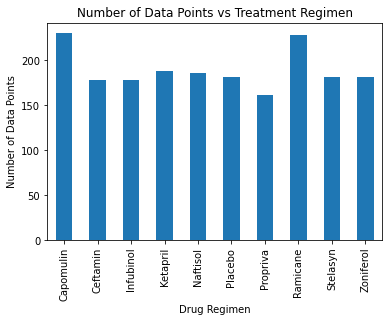

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = combined.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot_data = bar_plot.plot.bar(rot='vertical', title='Number of Data Points vs Treatment Regimen')
bar_plot_data.set_xlabel("Drug Regimen")
bar_plot_data.set_ylabel("Number of Data Points")


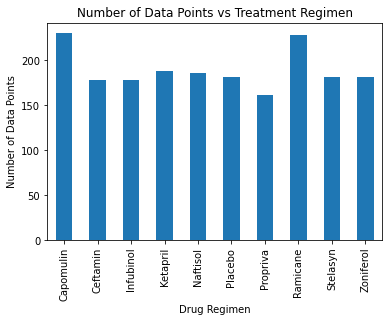

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
py_plot = combined.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
py_plot.plot(kind="bar", label='Number of Measurements')

plt.xdata = py_plot.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points vs Treatment Regimen')

plt.show()

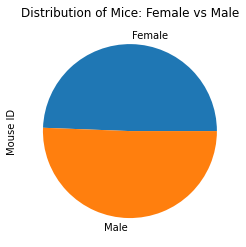

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combined.groupby('Sex').count()['Mouse ID']

pie_plot = gender.plot.pie(y='Sex',title='Distribution of Mice: Female vs Male')


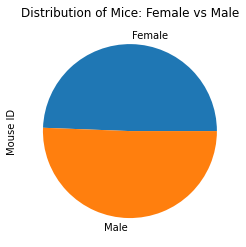

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_gender = combined.groupby('Sex').count()['Mouse ID']

plt.pie(pyplot_gender,labels=gender.index)
plt.title('Distribution of Mice: Female vs Male')
plt.ylabel('Mouse ID')
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Capomulin
capomulin_df = clean.loc[clean["Drug Regimen"] == "Capomulin", :]
capomulin_tp = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_tp
capomulin_vol = pd.DataFrame(capomulin_tp)

# Merge Capomulin df with the original dataframe to get the tumor volume at the last timepoint
capomulin_tp_merge = pd.merge(capomulin_vol, clean, on = ("Mouse ID", "Timepoint"), how = "left")

In [21]:
# Ramicane
ramicane_df = clean.loc[clean["Drug Regimen"] == "Ramicane", :]
ramicane_tp = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_tp
ramicane_vol = pd.DataFrame(ramicane_tp)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_tp_merge = pd.merge(ramicane_vol, clean, on = ("Mouse ID", "Timepoint"), how = "left")

In [22]:
# Infubinol
infubinol_df = clean.loc[clean["Drug Regimen"] == "Infubinol",:]
infubinol_tp = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_tp
infubinol_vol = pd.DataFrame(infubinol_tp)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint 
infubinol_tp_merge = pd.merge(infubinol_tp, clean, on = ("Mouse ID", "Timepoint"),how="left")

In [23]:
# Ceftamin
ceftamin_df = clean.loc[clean["Drug Regimen"] == "Ceftamin",:]
ceftamin_tp = ceftamin_df.groupby("Mouse ID").max()['Timepoint']
ceftamin_tp
ceftamin_vol = pd.DataFrame(ceftamin_tp)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint 
ceftamin_tp_merge = pd.merge(ceftamin_vol, clean, on = ("Mouse ID", "Timepoint"), how = "left")
ceftamin_tp_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
cap_ram_merge = pd.merge(capomulin_tp_merge, ramicane_tp_merge, how = "outer")
inf_cert_merge = pd.merge(infubinol_tp_merge, ceftamin_tp_merge, how = "outer")
regimen_merge = pd.merge(cap_ram_merge, inf_cert_merge, how = "outer")
regimen_merge_df = pd.DataFrame(regimen_merge)
regimen_merge_df["Drug Regimen"].value_counts()
regimen_merge_df    

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,x226,0,Ceftamin,Male,23,28,45.000000,0
96,x581,45,Ceftamin,Female,19,28,64.634949,3
97,x822,45,Ceftamin,Male,3,29,61.386660,3
98,y769,45,Ceftamin,Female,6,27,68.594745,4


In [25]:
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
